## BINARY CLASSFICATION TASK ##
The goal is to correctly classifying red wines based on their physio.chemical characteristics. Wines's quality is adressed as score from zero to 10, that's why i am going to set an arbitrary threshold to allow wines' classification between a good and a bad wine.


Input variables (based on physicochemical tests): 
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [1543]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy.random import normal
from numpy import hstack
from numpy import asarray
import pandas as pd
import seaborn as sns

In [1544]:
path = r'C:\Users\acer\Documents\ML_projects_datasets\winequality.csv'.replace('\\','/')
path_2 = r'C:/Users/acer/Documents/ML_projects_datasets/winequality.csv'
dataset = pd.read_csv(path)
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EXPLORATORY ANALYSIS #
I am going to plot all the attributes in the dataset

In [1545]:
dataset.drop('quality', axis = 1 )
dataset.shape


(1599, 12)

There are 1599 rows or examples and 12 attributes

In [1546]:
print(dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [1549]:
nan = dataset.isna().sum()
print(nan)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


NO Null values in this database

In [1550]:
#checking for duplicate rows
dataset.duplicated().any()
print('There are:', dataset.duplicated().sum(), 'duplicated rows')



There are: 240 duplicated rows


Dropping duplicated rows

In [1551]:
dataset.drop_duplicates(inplace = True)
dataset.drop('quality', axis = 1 )
print(dataset.shape)

(1359, 12)


In [1552]:
columns =   [ col for col in dataset.columns]
attributes = [col for col in dataset.columns if col != 'quality']
print(columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


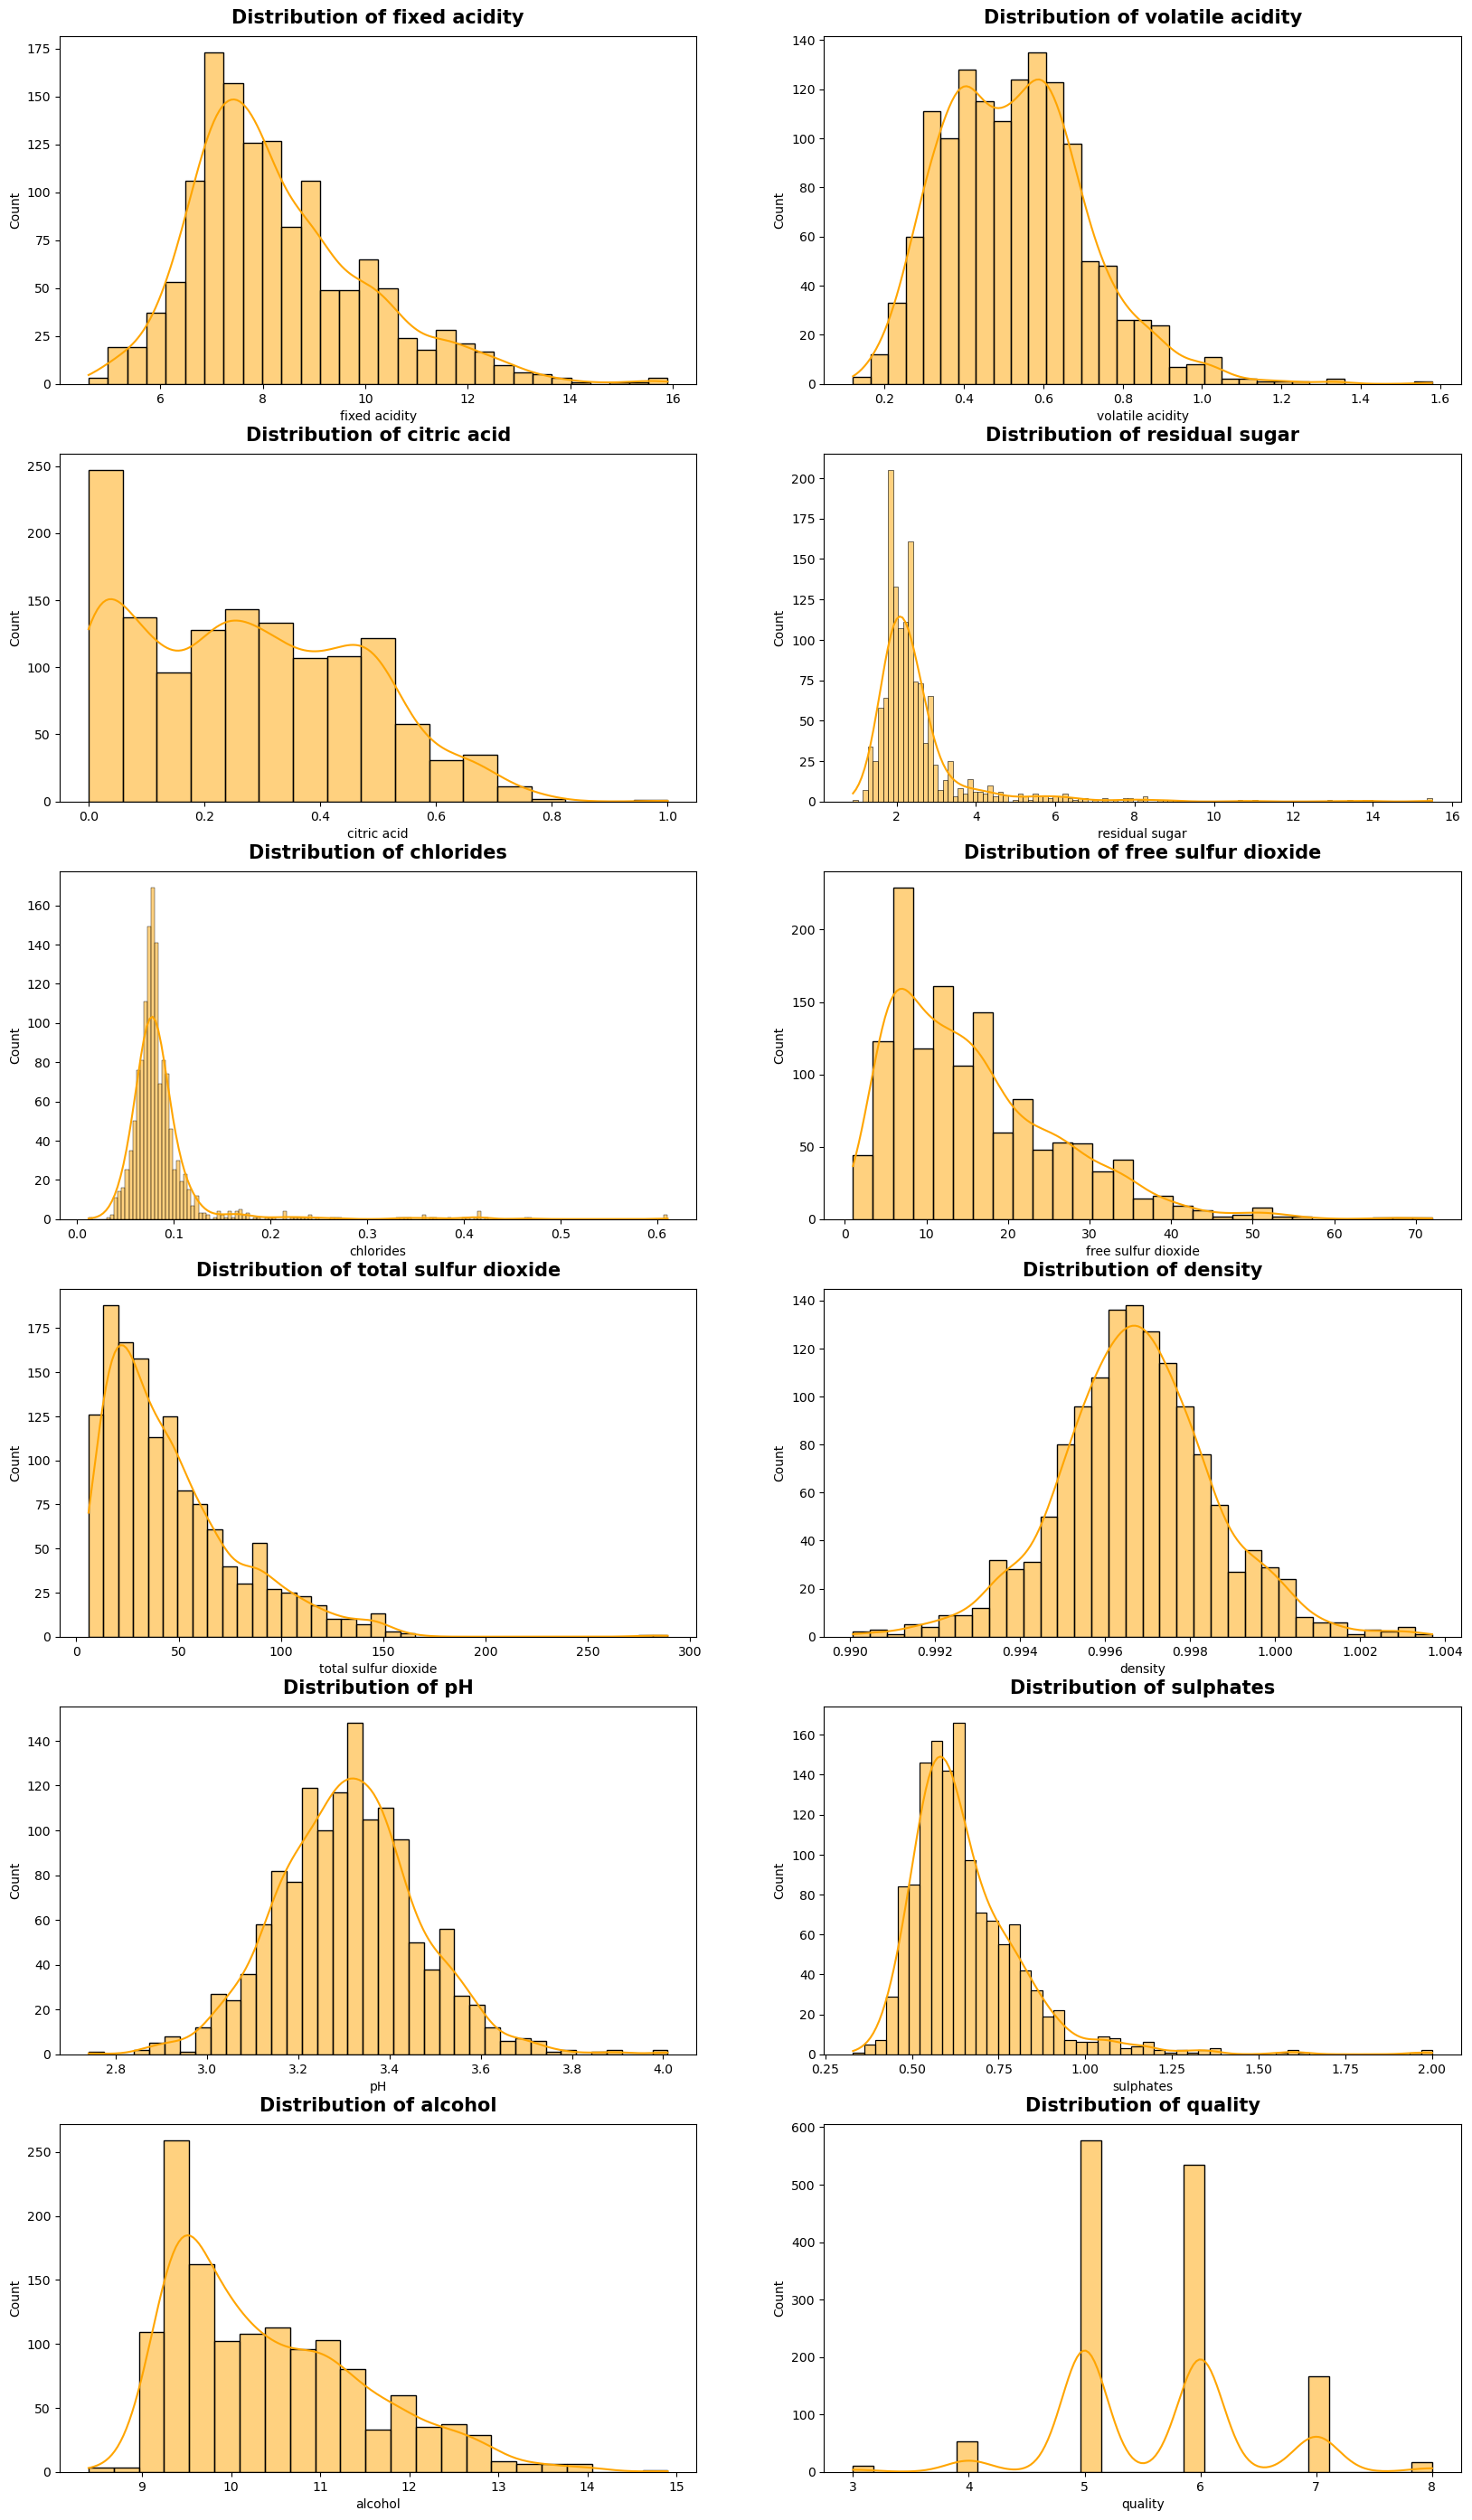

In [1553]:

plt.subplots(6,2,figsize=(20,35))

for i in range(len(columns)):
    
    plt.subplot(6,2,i+1)
    sns.histplot(dataset[columns[i]], kde = True, color = 'orange');
    plt.title( f'Distribution of {columns[i]}', fontweight = 'black', size = 15, pad = 10)
plt.show()


Afterplotting distributions, there are some features that are strongly skewed on the right. I could apply some data transformation procedures to corret this behaviour.

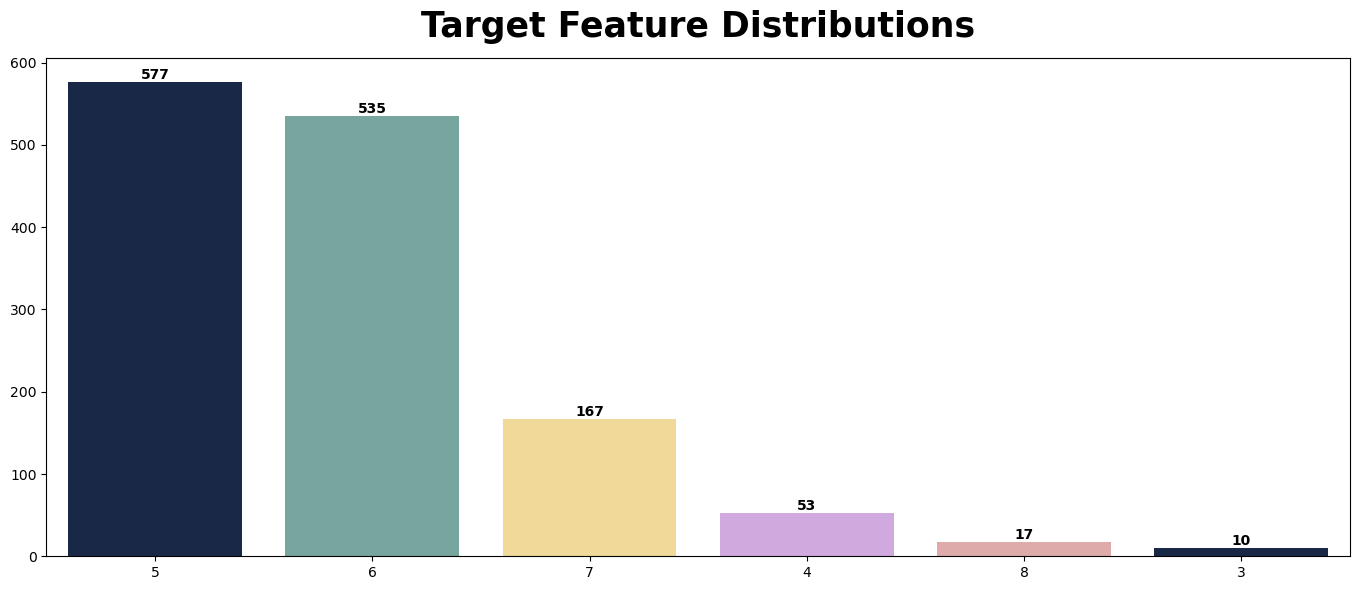

In [1554]:
#plotting wine quality
plt.figure(figsize=(13.7,6))
vc = dataset["quality"].value_counts()
sns.barplot(x=vc.index, y=vc.values, order=vc.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(vc.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()


Target feature distributions leans strongly towards wines with 5 and 6 quality, with really few representatives for wines having qaulity score above 6 (7,8 classes) and also for those less than 5 (4,3 classes)

**NOTE ** After class subdivision, is even more obvious imbalances in target variable. it could be interesting to see how much the class imbalance could affet our classification task

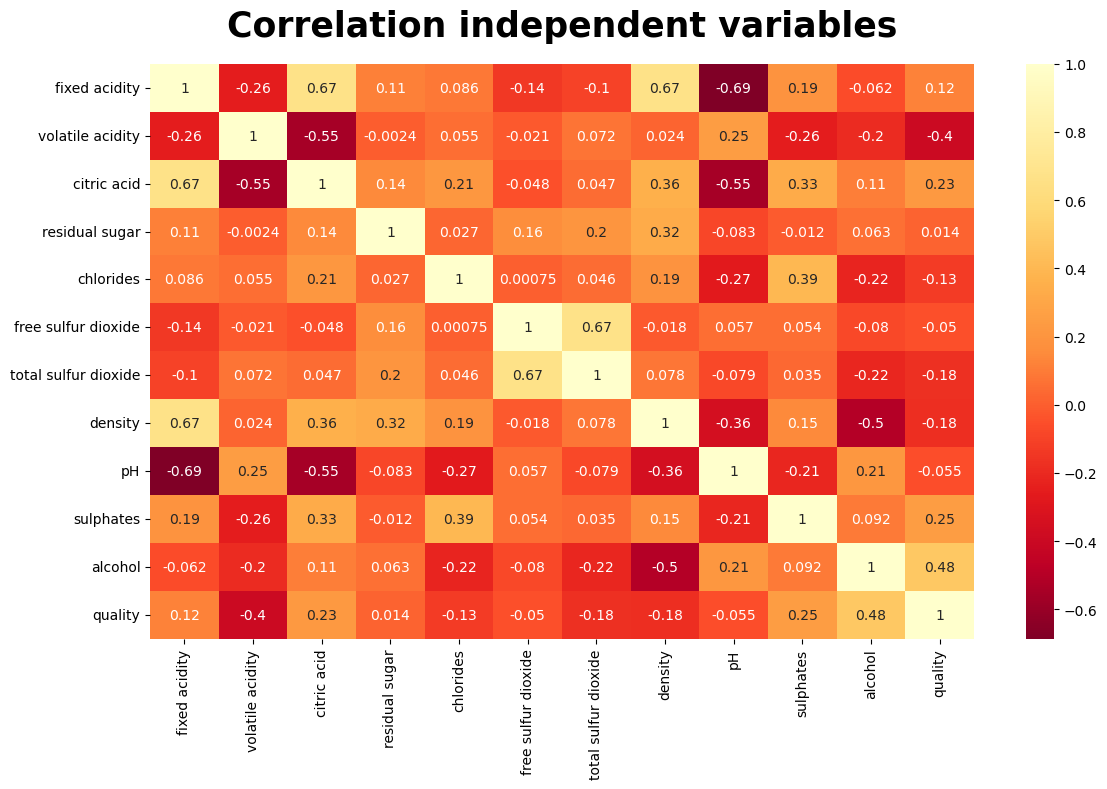

In [1555]:
correlations = dataset.corr(method = 'pearson')

plt.figure(figsize=(12,8))
heat_map = sns.heatmap(correlations,fmt = '.2g',annot = True, cmap = 'YlOrRd_r')
plt.title('Correlation independent variables', fontweight = 'black',size = 25, pad = 20)
plt.tight_layout()
plt.show()

From the correlation matrix: 
- **Alcohol** and **sulphates** are positively correlated with **quality**, also **citric acid** and **fixed acidity** to a much less extent.
- **Volatile acidity**, Total suplhur dioxide and density are negatively correlated.

In [1556]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data preparation #
In data preparation we are following different steps to prepare data in the best optimal way to algorithms.
All my features are continous, but they all have different ranges, so I am normalizing them to be between 0 and 1




In [1557]:
values = dataset.values
x = values[:,:11]
y = values[:,-1].astype(int)


In [1558]:
print('All raw data: \n',x)
print('All labels: \n',y)

All raw data: 
 [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
All labels: 
 [5 5 5 ... 6 5 6]


In [1559]:
x.shape

(1359, 11)

In [1560]:

print(Counter(y))

Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})


In [1561]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(x)

In [1562]:
print('Rescaled data: \n',scaled)

Rescaled data: 
 [[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.11504425 0.29452055 0.1        ... 0.61417323 0.25748503 0.43076923]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [1563]:
scaled_df = pd.DataFrame(scaled , columns = attributes[:11])
scaled_df['quality'] = y

I am plotting the distribution of the original data along with those of the transformed ones, in order to make comparisons.

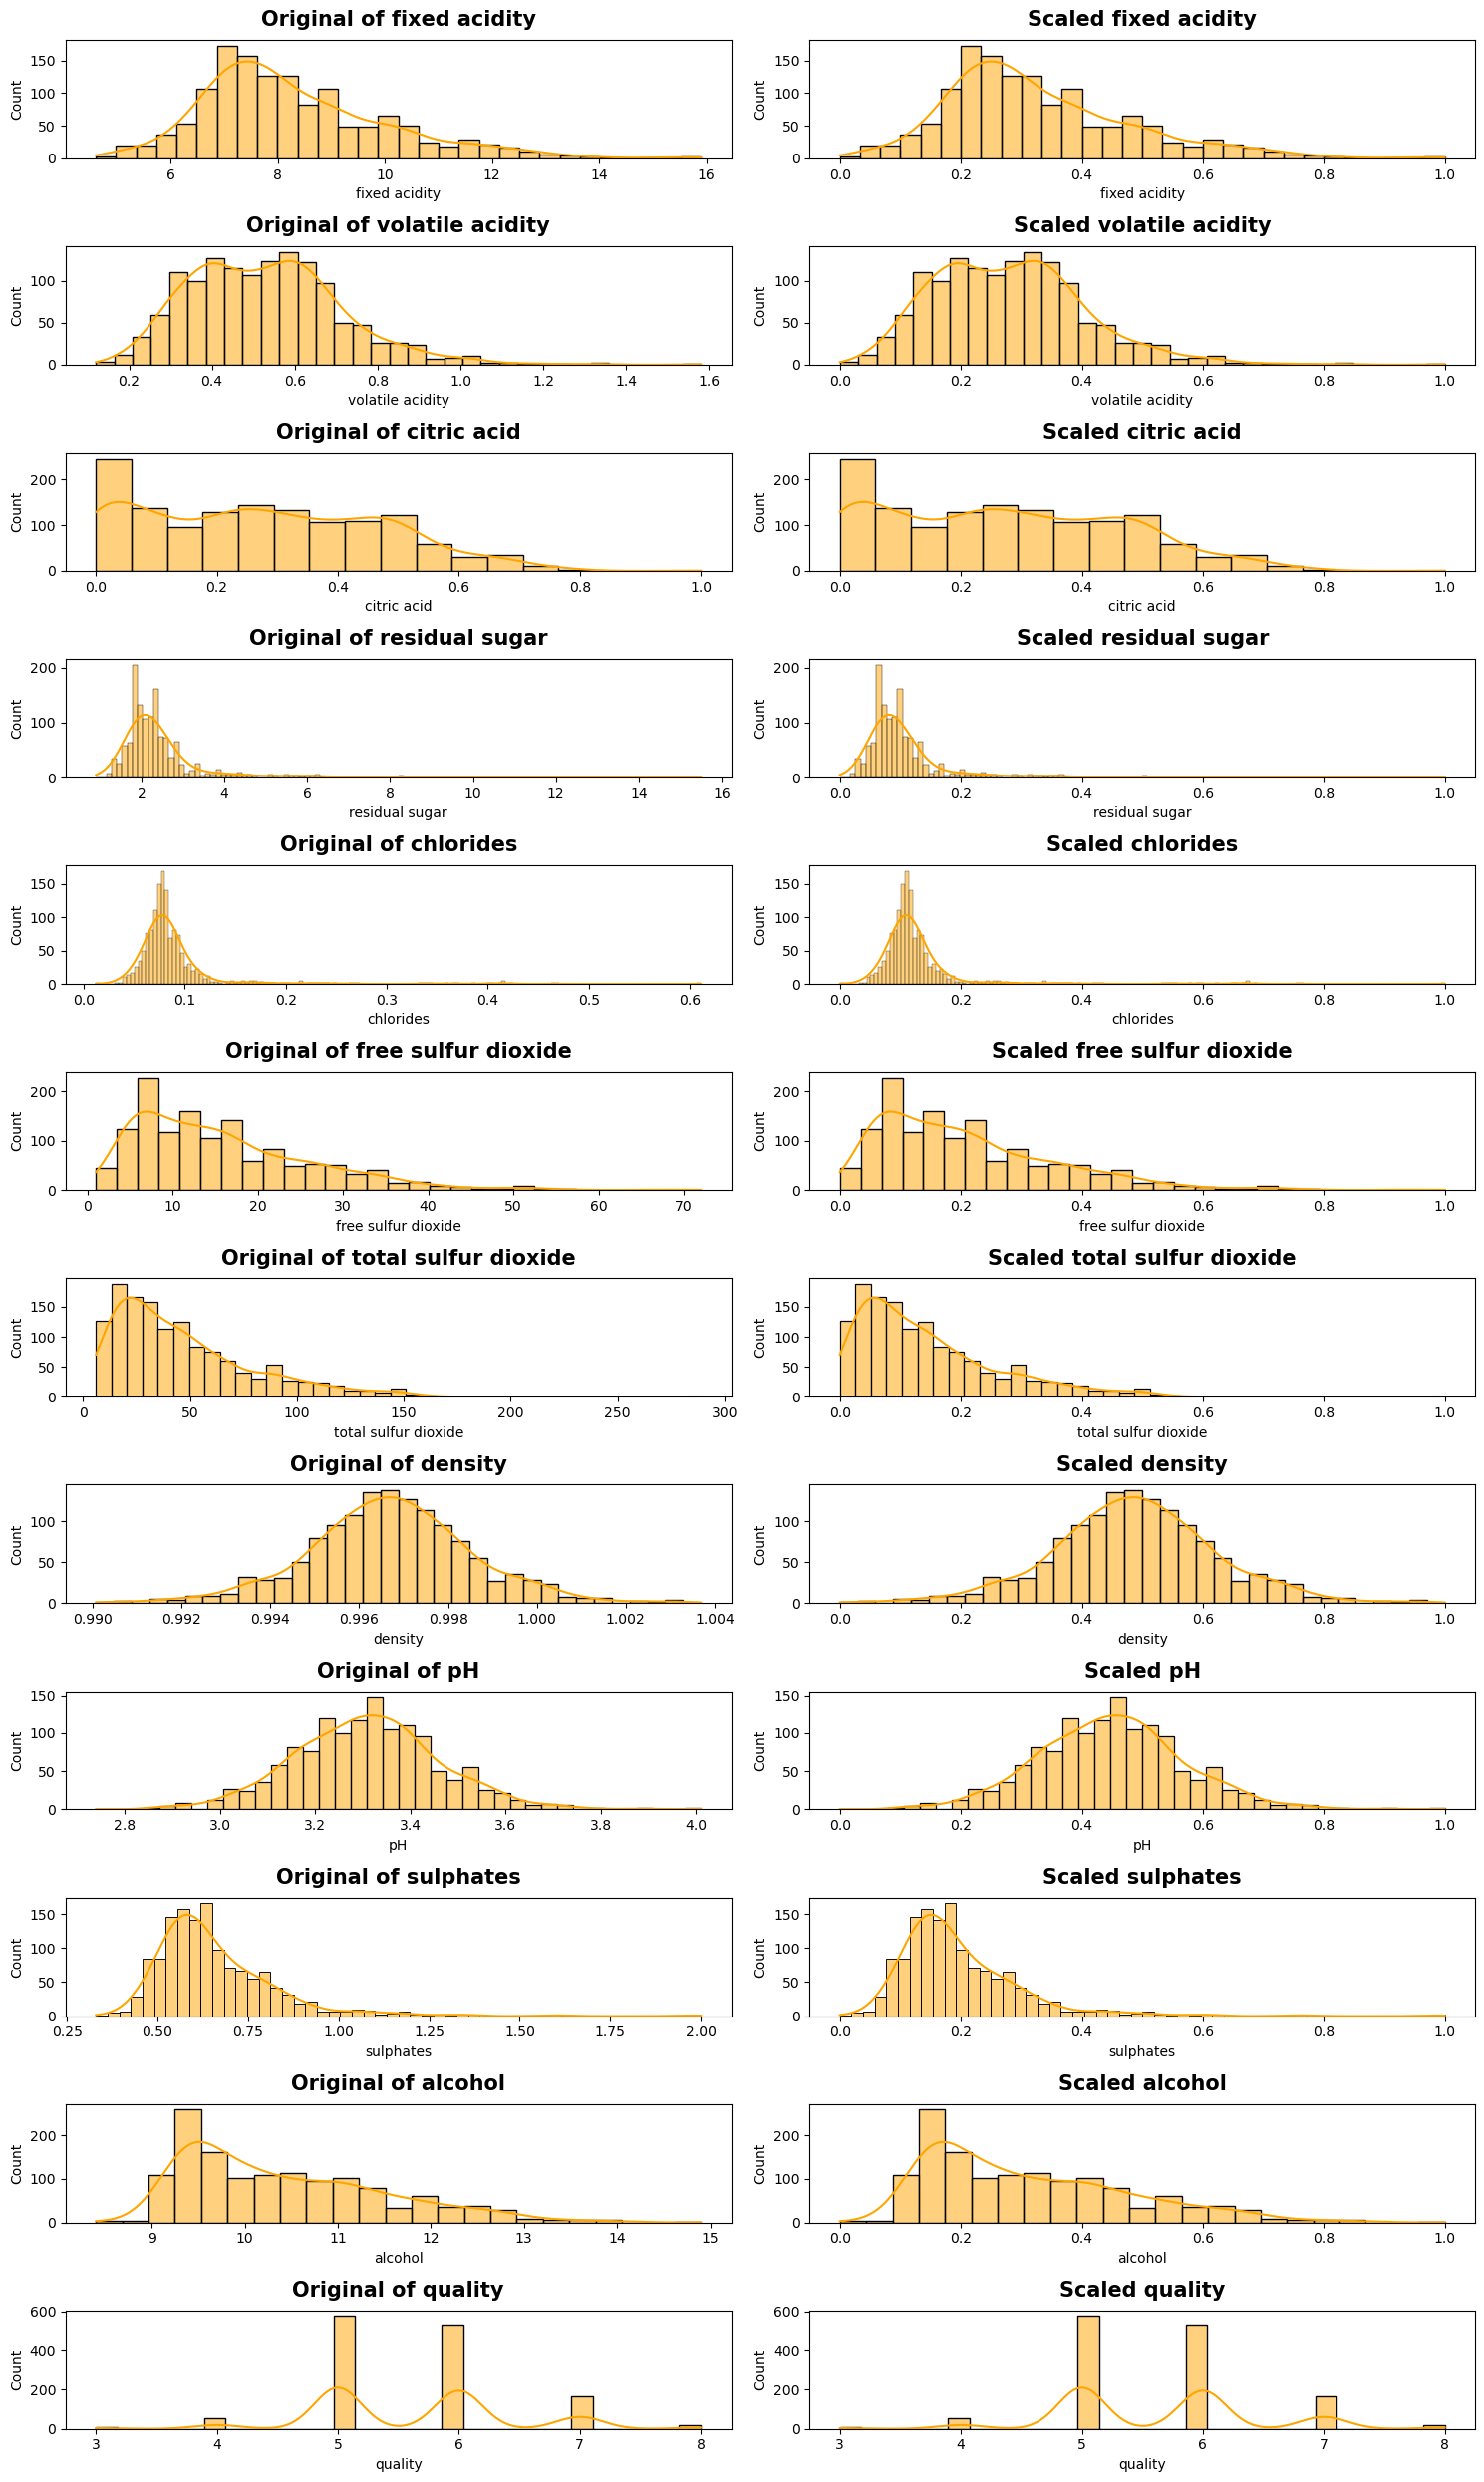

In [1564]:
fig, axes = plt.subplots(12,2,figsize=(15,25))

for i in range(len(columns)):
    
    sns.histplot(dataset[columns[i]], kde = True, color = 'orange', ax = axes[i,0])
    axes[i,0].set_title( f'Original of {columns[i]}', fontweight = 'black', size = 15, pad = 10)

for j in range(len(columns)):
    sns.histplot(scaled_df[columns[j]], kde = True, color = 'orange', ax = axes[j,1])
    axes[j,1].set_title( f'Scaled {columns[j]}', fontweight = 'black', size = 15, pad = 10)

plt.tight_layout()
plt.show()


From the correlation matrix we can observe:
- Positive correlation between Fixed acidity and citric acid and density.
- Alcohol is positively correlated with quality, chlorides with sulphates
- Negative correlation: Fixed acidity and pH



## Standardization ##
I am rescaling data with mean zero and standard devaition 1

In [1565]:
scaler = StandardScaler()
std = scaler.fit_transform(x)
     

In [1566]:
scaled_data = pd.DataFrame(std, columns = attributes[:11])
scaled_data['Class'] = y

In [1567]:
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,5
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,5
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,5
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,6
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,5


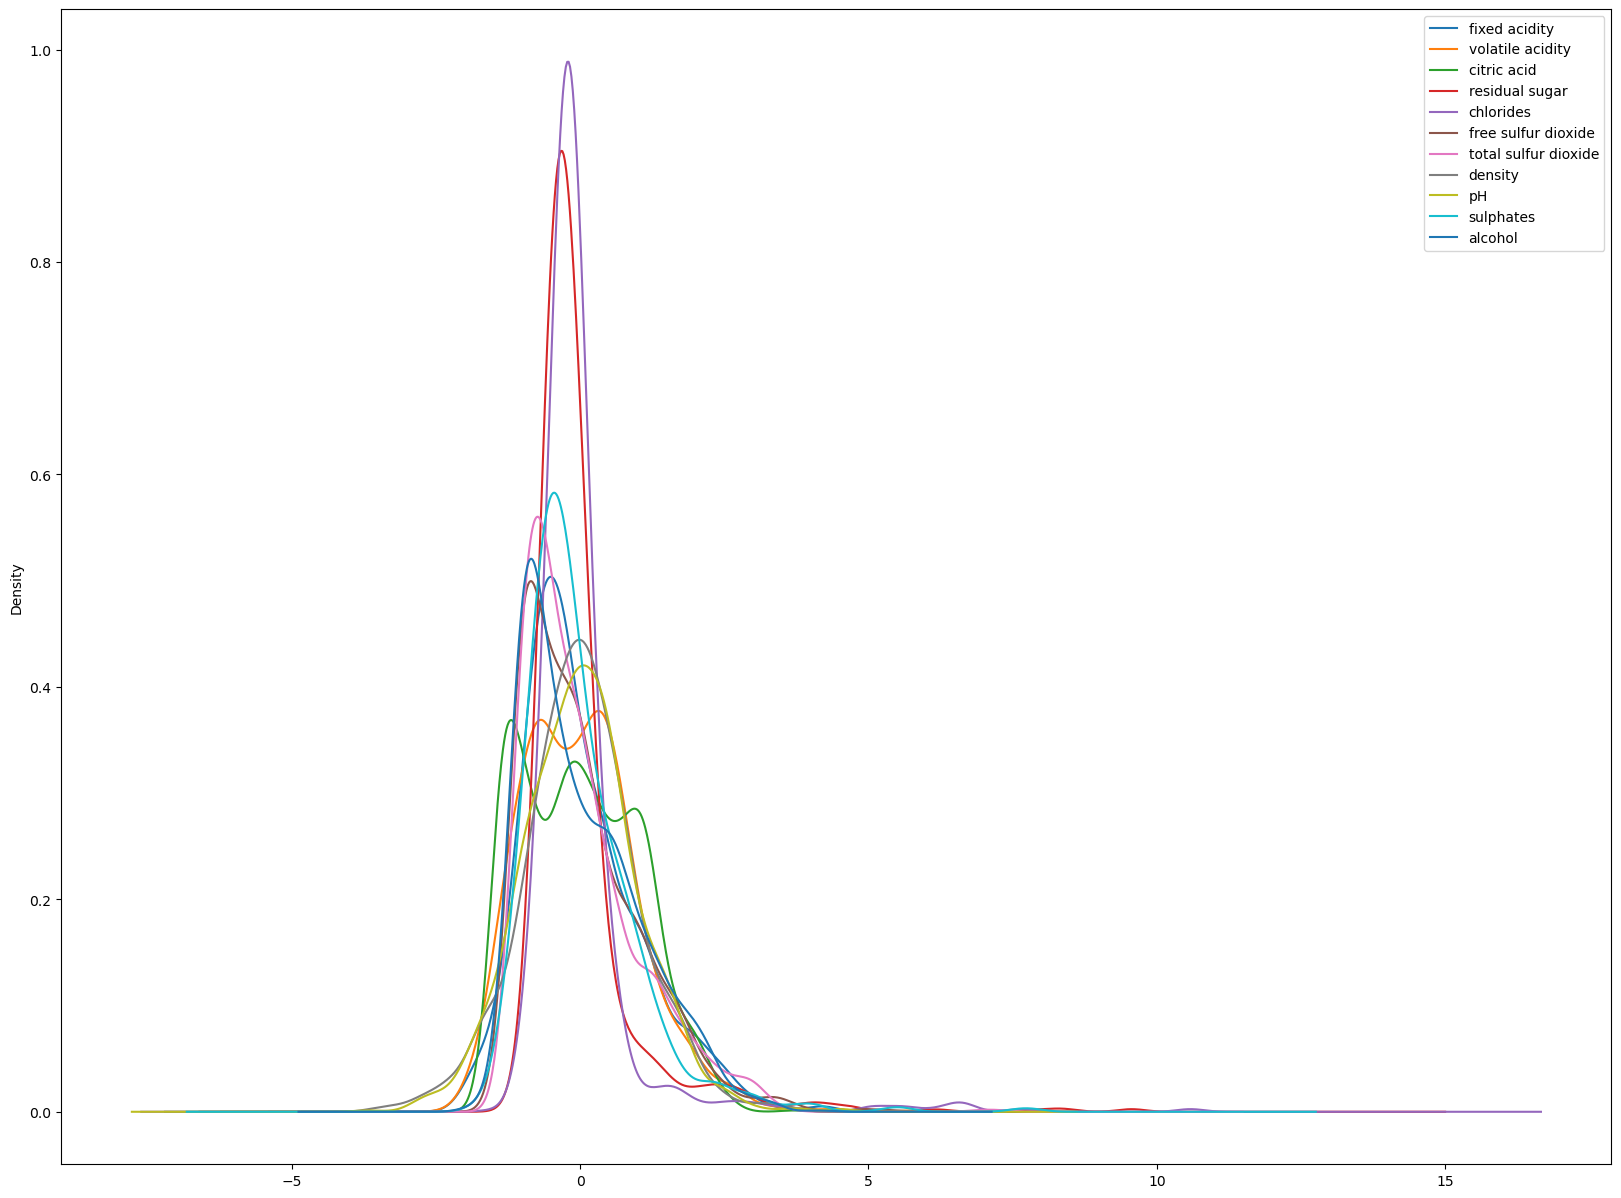

In [1568]:
std_df = pd.DataFrame(std, columns= attributes[:11])
std_df.plot(kind='density', subplots=False, sharex=False)
plt.rcParams["figure.figsize"] = [20,15]
plt.show()

## Subdividing into classes ##
Given the purpose of this task, wines are subdivided into two separated 'classes' on the basis of an arbitray chosen threshold value, which will be, on the basis of the values's distribution --> 6.5
So:
- quality < 6.5 --> BAD
- quality > = 6.5 --> GOOD

In [1569]:
bin_labels = ['0', '1']
bin_groups = [0,6.5,10]

df = pd.DataFrame(dataset)
df['Class'] = pd.cut(dataset['quality'], bins = bin_groups, labels = bin_labels)
df.drop('quality',axis = 1, inplace =  True)


In [1570]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [1571]:
df.isnull().sum().sum()

0

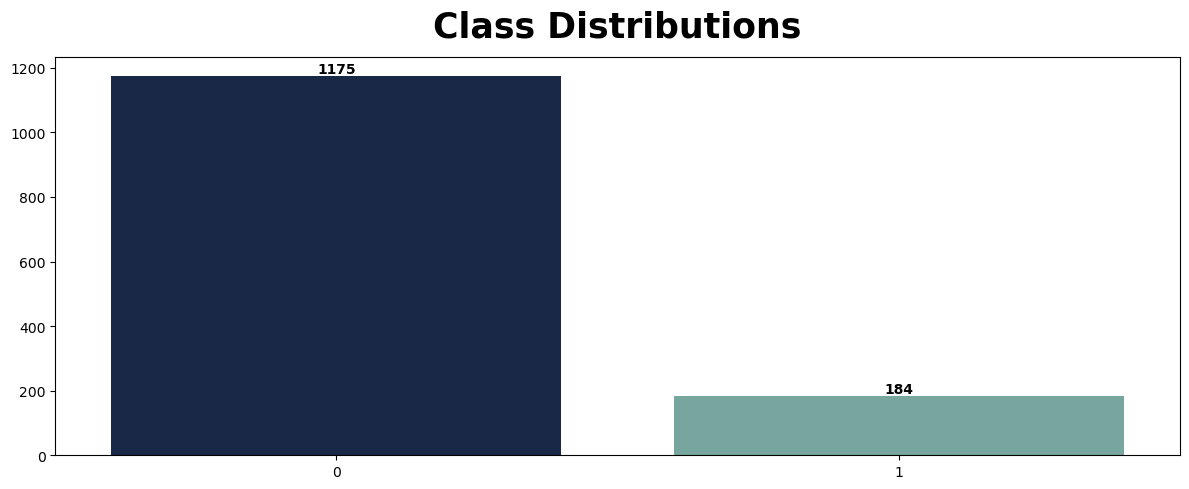

In [1572]:
#plotting 
plt.figure(figsize=(12,5))
vc = df['Class'].value_counts()
sns.barplot(x=vc.index, y=vc.values, order=vc.index, palette=["#11264e","#6faea4"])
plt.title("Class Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(vc.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
plt.tight_layout()
plt.show()

As expected from target feature distribution, binning examples using a treshold above '6' creates a huge class imbalance in favour of Zero-Class examples, ('Bad wine') leaving One-Class to less than 200 examples

In [1573]:
y = df['Class'].astype(int)
x = df.drop('Class', axis = 1).values


In [1574]:
print('Input variables: \n',x)

Input variables: 
 [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [1575]:
print('Target labels:\n',y)

Target labels:
 0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: Class, Length: 1359, dtype: int32


In [1576]:
attributes = df.columns.to_list()
print(attributes)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Class']


In [1577]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from collections import Counter

# FEATURE SELECTION #
I split the original dataset into 2 subsets: training and testing. In this way i can carry out all data processing steps and oversampling onto a training partition meanwhile leaving the untouched part for testing

In [1578]:
training_set, test_set = train_test_split(df, test_size= 0.30, random_state = 42)

In [1579]:
training_set = training_set.reset_index()
test_set = test_set.reset_index()

In [1580]:
y_train= training_set['Class'].astype(int)
y_test = test_set['Class'].astype(int)

X_train = training_set.loc[:,training_set.columns != 'Class'].values
X_test = test_set.loc[:,test_set.columns != 'Class'].values

In [1581]:
print('Training set: \n','total samples:',len(y_train))
print(' classes:', Counter(y_train))
print('\n')
print('Test set: \n','total samples:',len(y_test))
print(' classes:', Counter(y_test))

Training set: 
 total samples: 951
 classes: Counter({0: 821, 1: 130})


Test set: 
 total samples: 408
 classes: Counter({0: 354, 1: 54})


## Univariate analysis ##
Is part of the procedure to avoid model overfitting and poor generalization performance. I am going to select the most valuable features beased on Univariate statistical test, ANOVA F - test which tells how much the mean between groups varies


In [1582]:
print('Raw original:\n', x)
print('Target variables:\n',y)

Raw original:
 [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
Target variables:
 0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: Class, Length: 1359, dtype: int32


In [1583]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
anova = fs.fit(x, y)
print(anova.scores_)


[ 18.547729   104.45451986  58.66086525   3.79519069  12.83733526
   7.22434316  25.52512739  34.76711839   3.9879021   57.4592668
 274.08640276]


In [1584]:
columns_attributes = [att for att in df.columns if att != 'Class']

fixed acidity : 18.547729004584216
volatile acidity : 104.4545198621086
citric acid : 58.66086525292857
residual sugar : 3.79519069001506
chlorides : 12.837335255863517
free sulfur dioxide : 7.2243431638604125
total sulfur dioxide : 25.525127385976567
density : 34.76711838716316
pH : 3.9879021025150756
sulphates : 57.4592667963911
alcohol : 274.0864027578106


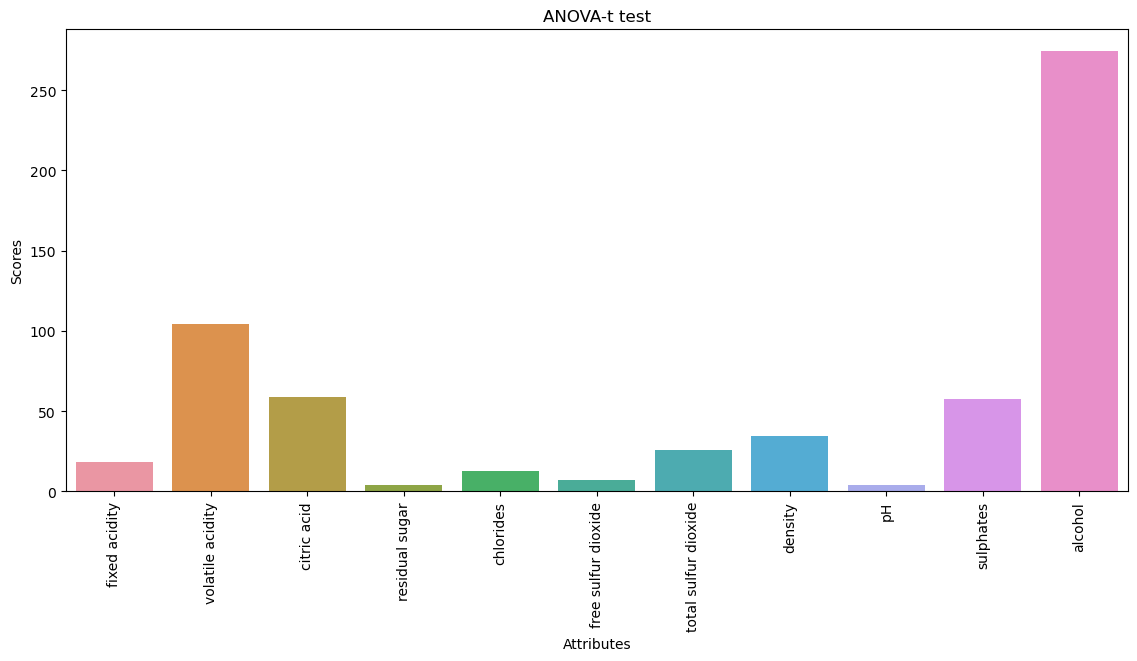

In [1585]:
# what are scores for the features
data  ={}
for name, score in zip(columns_attributes, anova.scores_):
 data[name] = float(score)
 print(name,':',score) ####!!!!!!!!!!
table = pd.DataFrame(data, index = [0])

transposed_df = table.T.reset_index()
transposed_df.columns = ['Category', 'Value']
plt.figure(figsize=(13.7,6))
sns.barplot(data=transposed_df, x='Category', y='Value')

plt.xlabel('Attributes')
plt.ylabel('Scores')
plt.title('ANOVA-t test')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.show()



According to tht ANOVA t- test, the most important feature by far is **alcohol**, followed by **volatile acidity** ,**citric acid** and **sulphates**. Which is consistent on what we saw on the Correlation matrix, where *quality* was positiviley correlated with these all attributes except *volatile acidity* that is negatively correlated. 

Given this, i am interested in seeing how these 4 variables are distributed by Wine quality, so, It could be interesting knowing which physiochemical characteristic makes the wine good.

In [1586]:
selected_attributes = ['alcohol','volatile acidity','citric acid','sulphates','Class']
selected_df = df[selected_attributes]
selected_df.head()

,alcohol,volatile acidity,citric acid,sulphates,Class
0,9.4,0.70,0.00,0.56,0
1,9.8,0.88,0.00,0.68,0
2,9.8,0.76,0.04,0.65,0
3,9.8,0.28,0.56,0.58,0
5,9.4,0.66,0.00,0.56,0


In [1587]:
'''

plt.subplots(2,2,figsize=(20,35))

for i in range(len(selected_attributes)):
    
    plt.subplot(2,2,i+1)
    sns.displot(df[selected_attributes[i]], kde = True, color = 'orange');
    plt.title( f'Distribution of {selected_attributes[i]}', fontweight = 'black', size = 15, pad = 10)
plt.show()
'''

"\n\nplt.subplots(2,2,figsize=(20,35))\n\nfor i in range(len(selected_attributes)):\n    \n    plt.subplot(2,2,i+1)\n    sns.displot(df[selected_attributes[i]], kde = True, color = 'orange');\n    plt.title( f'Distribution of {selected_attributes[i]}', fontweight = 'black', size = 15, pad = 10)\nplt.show()\n"

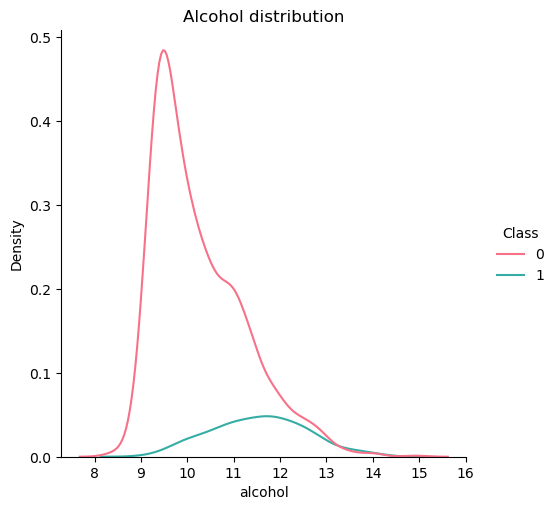

In [1588]:
fig = sns.displot(data=df, kind='kde', x='alcohol', hue='Class', palette = 'husl').set(title='Alcohol distribution')
     


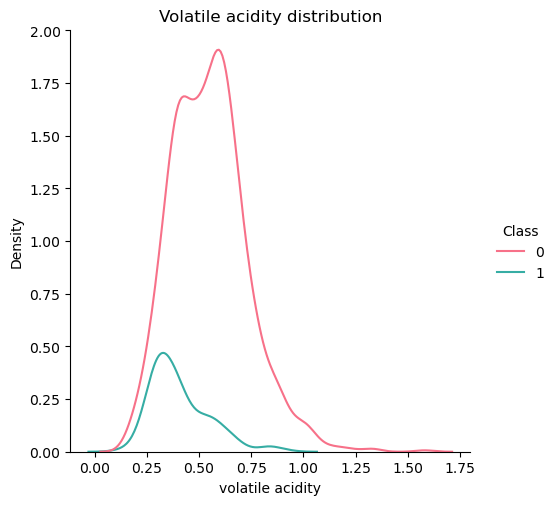

In [1589]:
fig = sns.displot(data=df, kind='kde', x='volatile acidity', hue='Class', palette= 'husl' ).set(title='Volatile acidity distribution')
     


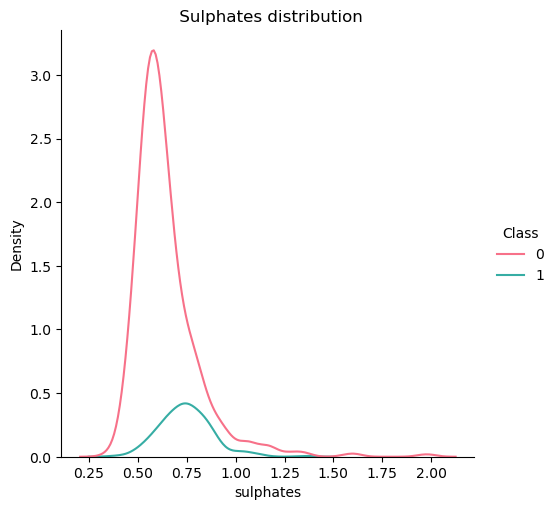

In [1590]:
fig = sns.displot(data=df, kind='kde', x='sulphates', hue='Class', palette= 'husl' ).set(title=' Sulphates distribution')


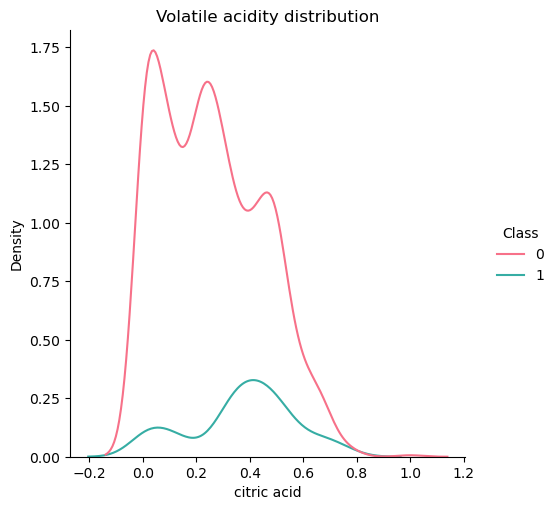

In [1591]:
fig = sns.displot(data=df, kind='kde', x='citric acid', hue='Class', palette= 'husl' ).set(title='Volatile acidity distribution')


From the distributions ,it seems that **alcohol** is the only variable that could discriminate in a good manner between 'bad' and 'good' wine. However, this distributionas are not indicative since the lack of examples in the '1' Class or 'good' wine in favor of the 'Bad' class does not allow a proper distinction of the 2 classes. Morevoer,  the classification performance of any algorithm could be hampered by this class imbalance.

## Dividing into classes ## 


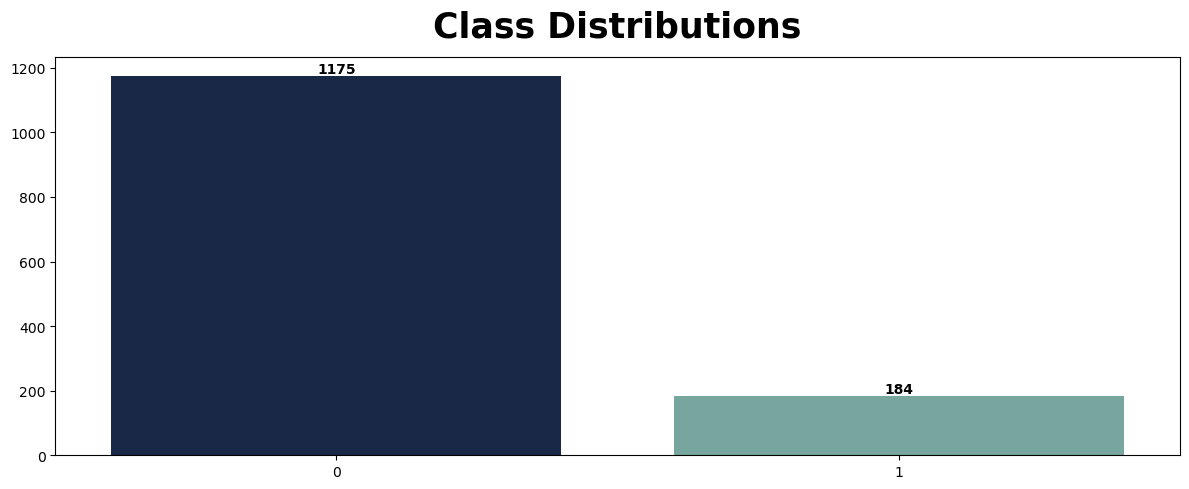

In [1592]:
#plotting 
plt.figure(figsize=(12,5))
vc = df['Class'].value_counts()
sns.barplot(x=vc.index, y=vc.values, order=vc.index, palette=["#11264e","#6faea4"])
plt.title("Class Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(vc.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
plt.tight_layout()
plt.show()

From the class distribution is clearly visible a huge imbalance in favour of the 'bad' quality wines. This imbalance could affect algorithm classification performances, so i am considering to apply an oversampling technique to treat class imbalance. 
For this purpose i will use SMOTE or Synthetich minority oversampling to create new examples from the minority class, 

In [1593]:
from imblearn.over_sampling import SMOTE


In [1594]:

#matches number of istances in the maj class
sm = SMOTE(random_state = 42, sampling_strategy = 'not majority') # resampling all mathcing the maj class (excluded)
# generates new istances
X_res , Y_res = sm.fit_resample(X_train,y_train)  

In [1595]:
#creating upsampled dataframe
oversampled_df = pd.DataFrame(X_res, columns = attributes)
oversampled_df['Class'] = Y_res

In [1596]:
print('Classes:',Counter(Y_res))

Classes: Counter({0: 821, 1: 821})


# MODEL SELECTION #
In this section i am going to select the best model to perform this classification task through a *10-fold cross-validation*.
Due to the class imbalancement, i will use 'StratifiedKFold' which keeps proportions between classes in each sub-set. I will evaluate 5 different classification algorithms; *Naive Baeys*,*Logistic Regression*, *Decision Trees*, *Random Forests* and *Support vector machines* over 4 datasets pre-processed with different techniques:

- Original raw --> contains original raw data without preprocessing steps
- Oversampled-SMOTE --> contains newly generated examples to match majority class
- Pre-processed-Original --> applying scaling techniques to original data
- Normalized -Original --> applying normalization to orignal data

To select the best algorithms and pre-processing steps, i will use F1 score and AUC (area under the curve) since the dataset is highly imbalanced towards one classe. I will eventually display Accuracy and MCC scores. This metrics will be calculated for each cross-validation partitioning, in the end the averaged values with std error will help in the assertion.

In [1597]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [1598]:
df = df.reset_index(drop=True)

In [1599]:

labels =  df['Class'].astype(int)
data = df.drop('Class',axis = 1)

In [1600]:
df.shape

(1359, 12)

In [1601]:
X = data.values
y = labels.astype(int)
print(X)
print(X.shape)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
(1359, 11)


* for simplicity sake, i will run the same code below for the 3 datasets and calculate each algorithm 's performance

## Function definition ##
i am defining all functions that i will need to perfomr CV and plotting metrics

*NOTE: The oversampling will be carried out only on the trainig fold of each cross-validation fold to avoid bias, hence leaving the test_set with the original class proportions

In [1602]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [1603]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1358,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,0


In [1604]:
# function for cross-validation

#storing the results of the cross-validation

def cross_validation(splits,model, oversampling, norm_scaler, std_scaler):

    X = df.iloc[:,:11].values
    Y = df.iloc[:,-1].astype(int)

    tbl = pd.DataFrame(columns = ['MCC','Pre','Rec','F1','Auc'])

    predicted_prob_auc = []
    stats = []
    skf = StratifiedKFold(n_splits = splits, random_state = 8, shuffle=True) 
    
    for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
        x_train_fold, x_test_fold = X[train_index], X[test_index]      #selected data for train and test in j-fold
        y_train_fold, y_test_fold = Y[train_index], Y[test_index]
        
        #oversampling dataset
        if oversampling == True:
            # resampling all mathcing the maj class (excluded)
            sm = SMOTE(random_state = 42, sampling_strategy = 'not majority') 
            # generates new istances
            x_res , y_res = sm.fit_resample(x_train_fold,y_train_fold)  
            model.fit(x_res,y_res)
            y_pred = model.predict(x_test_fold)
            y_score = model.predict_proba(x_test_fold)[:,1]
            y_pred_prob = roc_auc_score(y_test_fold,y_score)
        #normalization
        elif norm_scaler == True:
            scaler = MinMaxScaler()
            x_train_scaled = scaler.fit_transform(x_train_fold)
            x_test_scaled = scaler.transform(x_test_fold)
            model.fit(x_train_scaled, y_train_fold)
            y_pred = model.predict(x_test_scaled)
            y_score = model.predict_proba(x_test_fold)[:,1]
            y_pred_prob = roc_auc_score(y_test_fold,y_score)
        #standardize
        elif std_scaler == True:
            std = StandardScaler()
            x_train_scaled = std.fit_transform(x_train_fold)
            x_test_scaled = std.transform(x_test_fold)
            model.fit(x_train_scaled, y_train_fold)
            y_pred = model.predict(x_test_scaled)
            y_score = model.predict_proba(x_test_fold)[:,1]
            y_pred_prob = roc_auc_score(y_test_fold,y_score)

        #original dataset
        else:
            model.fit(x_train_fold,y_train_fold)
            y_pred = model.predict(x_test_fold)
            y_score = model.predict_proba(x_test_fold)[:,1]
            y_pred_prob = roc_auc_score(y_test_fold,y_score)

        predicted_prob_auc.append(y_pred_prob)
        
        # calculating metrics in each fold
        pre = precision_score(y_test_fold, y_pred)
        rec = recall_score(y_test_fold, y_pred)
        f1 = f1_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold,y_pred)



        tbl.loc[len(tbl.index)] = [mcc,f1,pre,rec,y_pred_prob]

    Sts = []
    for metric in tbl.columns:  
        string = "%.3f +/- %.3f" % (tbl[metric].mean(), (tbl[metric].std()/np.sqrt(splits)))
        Sts.append(string)

        
    return Sts, predicted_prob_auc


## Cross-Validation ##

In [1605]:
#this is meant as a proof
dataframes= ['Raw_original','SMOTE','Std_orignal','Norm_original']
models = [(DecisionTreeClassifier(),'DT'),(GaussianNB(),'NB'),(SVC(probability=True),'SVM'),(LogisticRegression(max_iter=5000),'LGR'),(RandomForestClassifier(n_estimators=100),'RFC')]
final_cv_results = pd.DataFrame(columns=['Dataset','Classifier','MCC','F1','Pre','Rec','AUC'])
splits = 10

for title in dataframes:
        oversamp, normalize, standardize=  False, False, False
        if title == 'SMOTE':
                oversamp = True
        elif title == 'Norm_original':
                normalize = True

        elif title == 'Std_orignal':
                standardize = True
        
        for model,classifier in models:
                
                cv_results, predicted_prob = cross_validation(splits,model,oversamp,standardize, normalize)
                final_cv_results.loc[len(final_cv_results.index)] = [title,classifier,cv_results[0],cv_results[1],cv_results[2],cv_results[3],cv_results[4]]


c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is i

In [1606]:
final_cv_results

,Dataset,Classifier,MCC,F1,Pre,Rec,AUC
0,Raw_original,DT,0.358 +/- 0.032,0.440 +/- 0.030,0.438 +/- 0.019,0.457 +/- 0.048,0.683 +/- 0.022
1,Raw_original,NB,0.428 +/- 0.029,0.510 +/- 0.024,0.430 +/- 0.020,0.632 +/- 0.034,0.835 +/- 0.019
2,Raw_original,SVM,0.043 +/- 0.029,0.021 +/- 0.014,0.200 +/- 0.133,0.011 +/- 0.007,0.830 +/- 0.017
3,Raw_original,LGR,0.330 +/- 0.032,0.343 +/- 0.025,0.626 +/- 0.066,0.245 +/- 0.020,0.867 +/- 0.010
4,Raw_original,RFC,0.385 +/- 0.030,0.421 +/- 0.031,0.603 +/- 0.034,0.332 +/- 0.033,0.872 +/- 0.012
5,SMOTE,DT,0.345 +/- 0.036,0.437 +/- 0.030,0.376 +/- 0.022,0.544 +/- 0.054,0.701 +/- 0.024
6,SMOTE,NB,0.383 +/- 0.023,0.457 +/- 0.016,0.322 +/- 0.013,0.788 +/- 0.025,0.828 +/- 0.021
7,SMOTE,SVM,0.304 +/- 0.022,0.393 +/- 0.014,0.264 +/- 0.011,0.778 +/- 0.018,0.812 +/- 0.016
8,SMOTE,LGR,0.448 +/- 0.020,0.512 +/- 0.014,0.379 +/- 0.010,0.794 +/- 0.030,0.869 +/- 0.010
9,SMOTE,RFC,0.435 +/- 0.034,0.516 +/- 0.029,0.456 +/- 0.026,0.599 +/- 0.035,0.879 +/- 0.012



On raw data, Decision trees is the lowest performing model among the 5 selected, moreover its peformances are not equiparable on oversampeld data by SMOTE. LGR and RFC are the highest performning with a AUC of 0.867 and 0.871 on cross validation.

On SMOTE oversampled data, models do not improve so much, only slightly on somes.

As it is shown, normalizatio and standardization of training data do not help with the selected classifiers: Standardization seems to improve LGR performances and normalization, again LGR and RFC.

Given this findings i would like to test the 4 best performing classifiers: NB, SVM, LGR and RFC on a normalizaed original  dataset and normalized oversampled one.

In [1607]:
    
#final_cv_results.nlargest(2,columns = ['MCC'])


In [1608]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [1609]:
def cross_valdation_2(splits, dataframe, model, oversamp):
    
    labels =  dataframe['Class']
    data = dataframe.drop('Class',axis = 1)

    X = data.values
    y = labels.astype(int)
    
    skf = StratifiedKFold(n_splits = splits, random_state= 8, shuffle=True)  #should i seelct the random state? since i am running the code in3 different windows 
    
    if oversamp == True:
        sm = SMOTE(random_state = 42, sampling_strategy = 'not majority') 
            # generates new istances
        x_train,y_train = sm.fit_resample(X,y) 

        scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=skf)

    else:
        scores = cross_val_score(model, X, y, scoring='roc_auc', cv=skf)

    return scores
        


In [1610]:
dataframes = [('Raw_original',df),('SMOTE',df)]
models = [(DecisionTreeClassifier(),'DT'), (GaussianNB(),'NB'),(SVC(probability=True),'SVM'),(LogisticRegression(max_iter=5000),'LGR'),(RandomForestClassifier(),'RFC')]

results = pd.DataFrame(columns = ['Dataset','Classifier','accuracy_scores'])
final_cv_results = pd.DataFrame(columns=['Dataset','Classifier','MCC','Pre','Rec','F1','AUC'])
splits = 10
oversamp =  False

for title, dataframe in dataframes:
    
    if title == 'SMOTE':
        oversamp = True

    for model,classifier in models:

        scores = cross_valdation_2(splits,dataframe,model, oversamp)
        

        metric = "%.3f +/- %.3f" % (scores.mean(), (scores.std()/np.sqrt(splits)))
        metrics_cv = [title, classifier, metric ]
        #print(title,':', model,':',scores)
        print('Dataset:', title, 'Method:', classifier, 'Metric:', metric)
        
        results.loc[len(results.index)] = metrics_cv
        

NameError: name 'x_test_fold' is not defined

In [ ]:
results.head()

,Dataset,Classifier,accuracy_scores
0,Raw_original,DT,0.847 +/- 0.007
1,Raw_original,NB,0.836 +/- 0.008
2,Raw_original,SVM,0.866 +/- 0.001
3,Raw_original,LGR,0.873 +/- 0.006
4,SMOTE,DT,0.864 +/- 0.009


In [ ]:
#this function is used to calculate the fpr,tpr, auc scores to plot ROC curves, CROSS_VALIDATION
def results_(dict_proba, y_labels):

    y_test = np.concatenate(y_labels, axis = 0)
    table_result = pd.DataFrame(columns = ['model','fpr','tpr','auc'])

    for m_name, m_proba in dict_proba.items():
        probabilities = np.concatenate(m_proba)
        fpr, tpr, _ = roc_curve(y_test,  probabilities[:,1])
        auc = roc_auc_score(y_test, probabilities[:,1])         #area under the curve
    row = {'Classifier': m_name, 'fpr': fpr,'tpr': tpr,'auc': auc}
    table.loc[len(table)] = row

    return table_result 


# Model performance #
The best models selected in the previous part is going to be trained on 2/3 of the original dataset, and tested on a 1/3 sub-set. 
*RFC*,*SVM*,*LGR* and *NB* are going to be trained and tested on a hold out using as trainign sets an original dataset (nromalized) and a SMOTE-oversampled dataset.
As evaluation criterion i will use AUC and display ROC curves, since the 2 classes are imbalanced in the not-oversampled training set.

In [ ]:
from sklearn import preprocessing


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [ ]:
y = df['Class'].astype(int)
x = df.iloc[:,:11].values

In [ ]:
X_train, X_test, y_train_set, y_test_set = train_test_split(x,y, test_size= 0.35,stratify= y,  random_state = 42)

I am splitting the dataset into training and testing set, in doing so, given the imbalanced classes al will keep the proportion in these subsets from the orignal dataset (stratify). In addition i normalize the features in the [0 - 1 ] range

In [ ]:
#scaling data before oversampling and model fitting

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[0.57142857 0.15702479 0.67948718 ... 0.13913043 0.3030303  0.38461538]
 [0.58035714 0.45454545 0.70512821 ... 0.26956522 0.23030303 0.16923077]
 [0.02678571 0.74380165 0.05128205 ... 0.77391304 0.09090909 0.32307692]
 ...
 [0.375      0.62396694 0.16666667 ... 0.50434783 0.11515152 0.47692308]
 [0.19642857 0.19834711 0.32051282 ... 0.47826087 0.16363636 0.26153846]
 [0.51785714 0.38842975 0.62820513 ... 0.3826087  0.13939394 0.18461538]]


In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print('Train set: ',Counter(y_train_set))
print('Test set: ',Counter(y_test_set))


(883, 11)
(476, 11)
Train set:  Counter({0: 763, 1: 120})
Test set:  Counter({0: 412, 1: 64})


In [1611]:
#oversampling training data
sm = SMOTE(random_state = 42, sampling_strategy = 'not majority') 
# generates new istances
x_res , y_res = sm.fit_resample(X_train_scaled,y_train_set)
print('oversampled SMOTE: ',Counter(y_res))


oversampled SMOTE:  Counter({1: 763, 0: 763})


In [ ]:
#training_sets = [('Raw',original_training),('Smote',oversamp_training)]
models = [(GaussianNB(),'NB'),(SVC(probability= True),'SVM'),(LogisticRegression(max_iter=5000),'LGR'),(RandomForestClassifier(n_estimators=100),'RFC')]
dataL = [('Raw',X_train_scaled,y_train_set),('Smote',x_res,y_res)]


In [ ]:
def ROC_curve(table,title_name):
    fig = plt.figure(figsize=(8,6))
    table.set_index('Classifier', inplace = True)

    for i in table.index:
        plt.plot(table.loc[i]['fpr'], 
        table.loc[i]['tpr'], 
        label="{}, AUC={:.3f}".format(i, table.loc[i]['auc']))
           
    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis: '+ title_name, fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
#iterate each model on two datasets, oversampled and feature selected
    
def model_performance(data,labels,models):
    
    table = pd.DataFrame(columns = ['Classifier','fpr','tpr','auc'])
    tb_metrics = pd.DataFrame(columns = ['Classifier','mcc','f1'])
    lst_cm = []
    for model, name in models:        #iterating over models 

        model.fit(data,labels)
        y_pred = model.predict(X_test_scaled)
        predicted_probabilities = model.predict_proba(X_test_scaled)
        
        cm = confusion_matrix(y_test_set, y_pred)
        lst_cm.append(cm)
        f1 = f1_score(y_test_set, y_pred)

        mcc = matthews_corrcoef(y_test_set,y_pred)
        tb_metrics.loc[len(tb_metrics.index)] = [name,mcc,f1]

        

        fpr, tpr, _ = roc_curve(y_test_set,  predicted_probabilities[:,1])
        auc = roc_auc_score(y_test_set, predicted_probabilities[:,1])


        fpr, tpr, _ = roc_curve(y_test_set,  predicted_probabilities[:,1])
        metric = [name, fpr, tpr, auc]

        table.loc[len(table.index)] = metric
       
    return table, tb_metrics, lst_cm
    

Raw
  Classifier       mcc        f1
0         NB  0.433456  0.511628
1        SVM  0.351918  0.303797
2        LGR  0.234218  0.240964
3        RFC  0.391587  0.435644


Smote
  Classifier       mcc        f1
0         NB  0.340216  0.420168
1        SVM  0.467521  0.524752
2        LGR  0.445898  0.502326
3        RFC  0.496029  0.567568




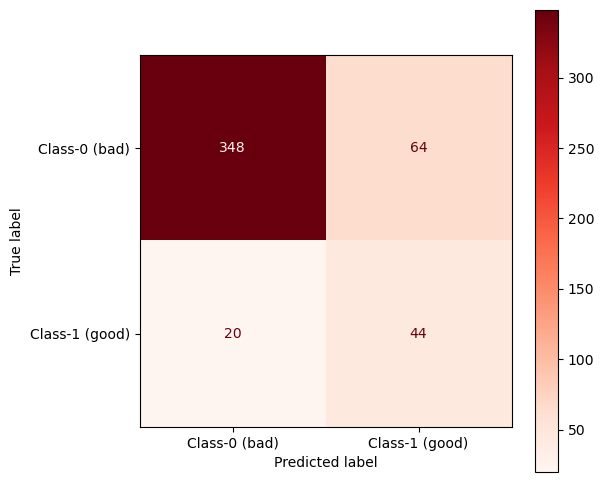

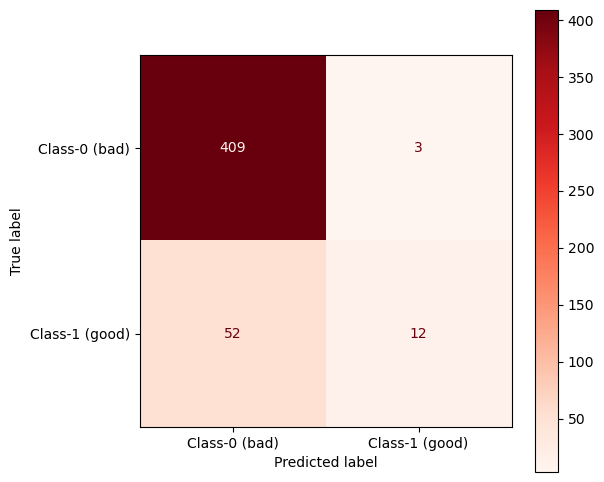

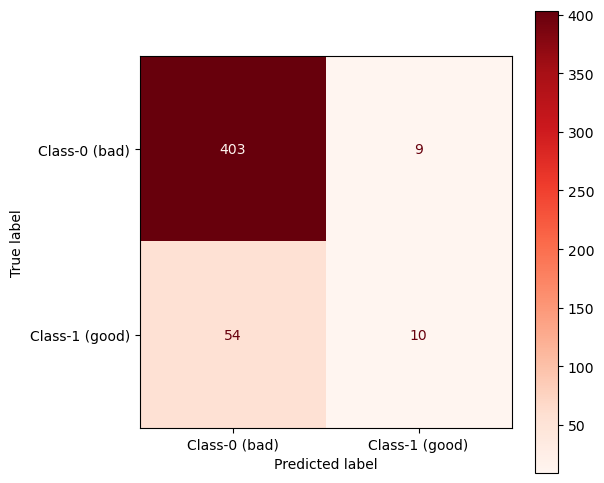

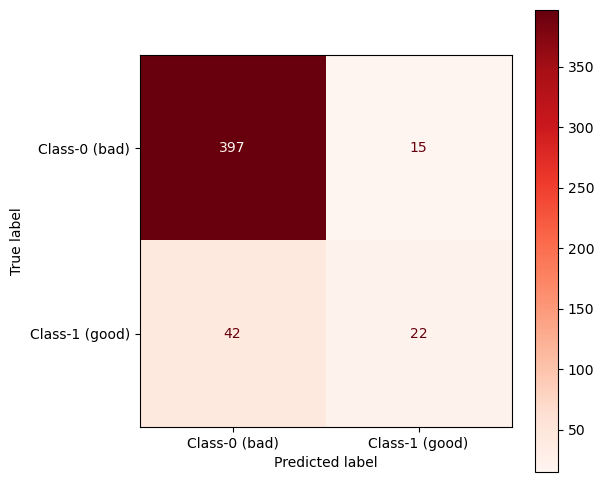

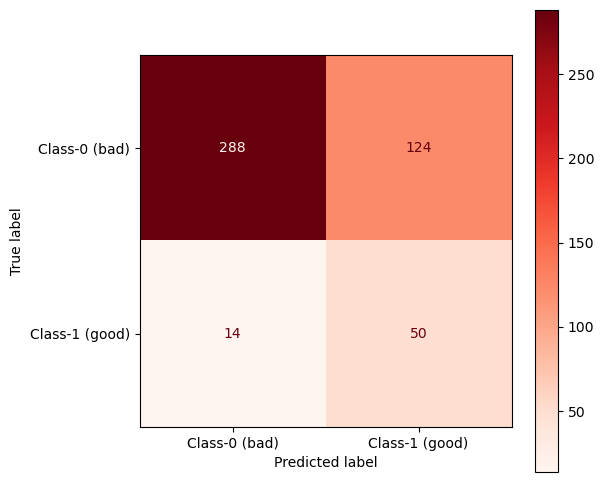

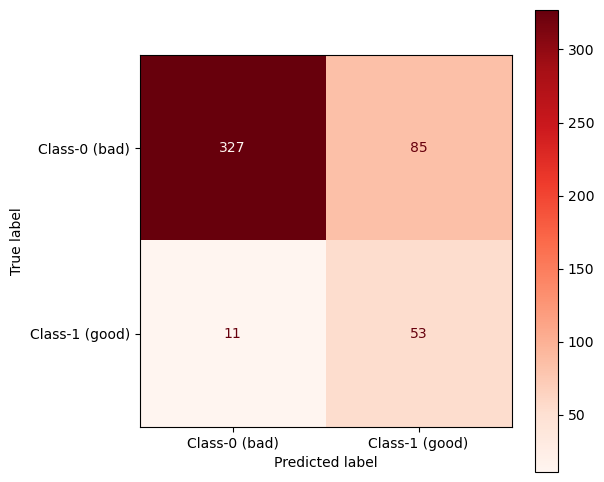

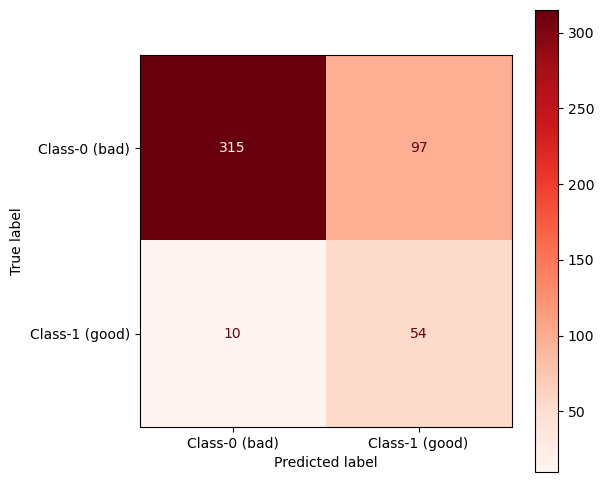

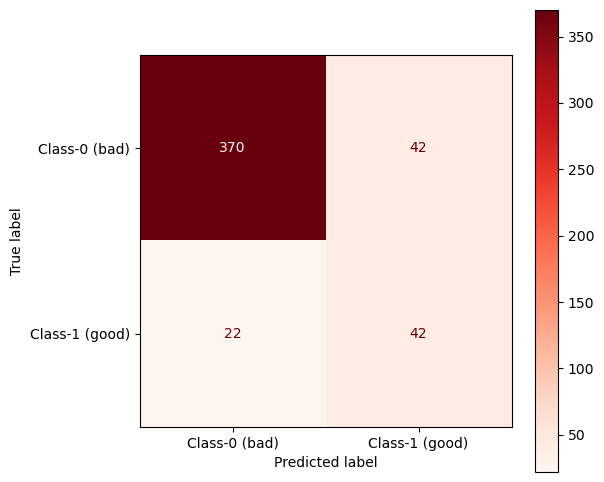

In [ ]:
target_classes = ['Class-0 (bad)','Class-1 (good)']

tables = []
confusion_matrices = []
for train_set in dataL:           #iterating over data
    
    tb_results = pd.DataFrame(columns = ['Classifier','mcc','auc','f1'])
    #datos = train_set[1].loc[:,df.columns != 'Class'].values
    #labels = train_set[1]['Class'].astype(int)


    table, table_metrics, lst_cm = model_performance(train_set[1],train_set[2],models)
    #table = model_performance(datos,labels,models)
    #tb_results.loc[len(tb_results.index)] = stats
    
    tables.append(table)
    #confusion_matrices.append(lst_cm)

    for cm, model in zip(lst_cm, models):
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =target_classes )
        fig, ax = plt.subplots(figsize=(6,6))
        ax.grid(False)
        disp.plot(cmap='Reds', ax=ax)
        #disp.ax_.set_title(train_set[0],':', model[1])


    print(train_set[0])
    print(table_metrics)
    print('\n')

    '''
    print('Training data: ',train_set[0])
    for metric in table_metrics:
        print('Classifier: ',metric[0],'\n MCC :',metric[1],'\n acc :',metric[2],'\n F1 :',metric[3] )

    '''

In [ ]:
tables[0].head()

,Classifier,fpr,tpr,auc
0,NB,"[0.0, 0.0024271844660194173, 0.004854368932038...","[0.0, 0.0, 0.0, 0.03125, 0.03125, 0.046875, 0....",0.837758
1,SVM,"[0.0, 0.0024271844660194173, 0.002427184466019...","[0.0, 0.0, 0.125, 0.125, 0.15625, 0.15625, 0.1...",0.861726
2,LGR,"[0.0, 0.0024271844660194173, 0.002427184466019...","[0.0, 0.0, 0.015625, 0.015625, 0.046875, 0.046...",0.866770
3,RFC,"[0.0, 0.0, 0.0, 0.0024271844660194173, 0.00242...","[0.0, 0.015625, 0.046875, 0.046875, 0.078125, ...",0.883154


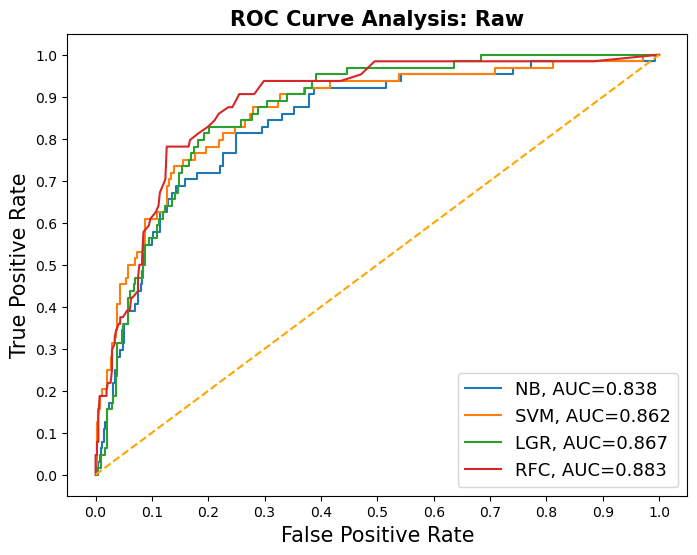

In [ ]:
ROC_curve(tables[0],dataL[0][0])

In [ ]:
tables[1].head()

,Classifier,fpr,tpr,auc
0,NB,"[0.0, 0.0024271844660194173, 0.002427184466019...","[0.0, 0.0, 0.046875, 0.046875, 0.0625, 0.0625,...",0.806394
1,SVM,"[0.0, 0.0, 0.0, 0.007281553398058253, 0.007281...","[0.0, 0.015625, 0.09375, 0.09375, 0.1875, 0.18...",0.883192
2,LGR,"[0.0, 0.0024271844660194173, 0.002427184466019...","[0.0, 0.0, 0.03125, 0.03125, 0.109375, 0.10937...",0.873862
3,RFC,"[0.0, 0.0, 0.0, 0.0024271844660194173, 0.00242...","[0.0, 0.03125, 0.046875, 0.078125, 0.109375, 0...",0.897148


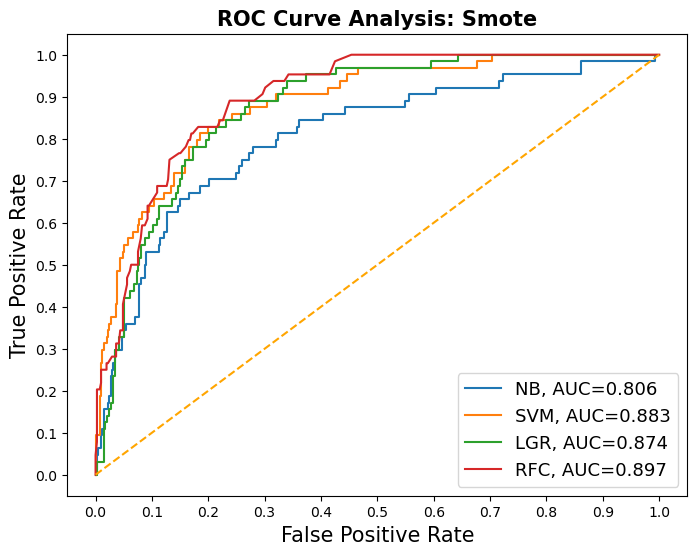

In [ ]:
ROC_curve(tables[1],dataL[1][0])


# Conclusions #
In this project, i tackled a Machine learning classification task reagrding wine quality. The best performing model was found to be *Random Forest Classifier* with an AUC of *0.897* and *0.883* on oversampld and original dataset respectively; followed by *SVM* and *LGR*.

In doing so i explored all attributes regarding wine quality.
.
I carried out a stratified 10-Fold cross-validation to test different models on different input data and i understood that:
- Normalization 
- Oversampling: helps in enhancing model performance on hold out 
- 
.
.
